In [71]:
%load_ext blackcellmagic

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
TODAY = pd.Timestamp('2022-12-18').strftime('%Y-%m-%d')

# Data creation

**TODO**
* create a new df for each feeding day and use a concat

## Sourdough feeding data

### Feeding dates

In [3]:
# creating a more or less true history
past_feeding_dates = pd.date_range(start='2022-07-24', end='2022-12-11', freq='7D')

In [4]:
feeding_dates = []

In [5]:
for i in past_feeding_dates:
  feeding_dates.append(i.strftime('%Y-%m-%d'))

In [6]:
feeding_dates.append(TODAY)

### Temperature

In [7]:
temperature = [22, 22, 22, 22, 23, 21, 21, 21, 20, 20, 20, 20, 19, 19, 20, 19, 18, 18, 19, 19, 18]

In [8]:
temperature_today = 19

In [9]:
temperature.append(temperature_today)

### Time

In [10]:
feeding_time = [8, 7,8,8,9,9,9,8,8,9,12,9,10,8,8,9,9,10,9,10,10]

In [11]:
feeding_time_today = 10

In [12]:
feeding_time.append(feeding_time_today)

### Growth

In [13]:
initial_height = [2.2, 2.4, 2.7, 2.1, 2.8, 2.6, 2.9, 2.4, 2.1, 2.2,
                  2.4, 2.2, 2.9, 2.5, 2.6, 2.9, 2.4, 2.7, 2.0, 2.7, 2.6]

In [14]:
end_height = [7.2, 7.8, 7.9, 6.3, 6.1, 7.5, 6.6, 6.6, 6.1, 7.1,
              7.8, 6.6, 7.3, 7.9, 7.5, 6.5, 6.9, 6.1, 6.2, 7.0, 6.6]

In [15]:
initial_height_today = 2.9

In [16]:
end_height_today = 7.9

In [17]:
initial_height.append(initial_height_today)

In [18]:
end_height.append(end_height_today)

### Bubbles

In [19]:
bubble_size = [0.2, 0.4, 0.3, 0.2, 0.1, 0.1, 0.4, 0.1, 0.3, 0.2, 0.4, 0.2, 0.1,
        0.3, 0.4, 0.2, 0.1, 0.1, 0.4, 0.4, 0.2]

In [20]:
bubble_size_today = 0.3

In [21]:
bubble_size.append(bubble_size_today)

### df

In [22]:
feedings_dict = {
    'feeding_date':feeding_dates, 
    'temperature':temperature,
    'feeding_time':feeding_time,
    'initial_height':initial_height,
    'end_height':end_height,
    'bubble_size':bubble_size
}

In [23]:
feedings = pd.DataFrame(data=feedings_dict)

## Data processing

### Bacteria composition

**TODO**
* improve bacteria composition

In [63]:
bacteria_composition = pd.DataFrame({
    'temperature':[20, 25,30, 35],
    'dominant_microbes':['none', 'lactic acid bacteria', 'Acetic acid bacteria', 'sourdough yeast']
})

In [64]:
bacteria_composition

,temperature,dominant_microbes
0,20,none
1,25,lactic acid bacteria
2,30,Acetic acid bacteria
3,35,sourdough yeast


In [72]:
feedings["bacteria_composition"] = np.where(
    feedings["temperature"] <= 20,
    bacteria_composition.loc[
        bacteria_composition["temperature"] == 20, "dominant_microbes"
    ],
    np.where(
        ((feedings["temperature"] > 20) & (feedings["temperature"] <= 25)),
        bacteria_composition.loc[
            bacteria_composition["temperature"] == 25, "dominant_microbes"
        ],
        np.where(
            ((feedings["temperature"] > 25) & (feedings["temperature"] <= 30)),
            bacteria_composition.loc[
                bacteria_composition["temperature"] == 30, "dominant_microbes"
            ],
            bacteria_composition.loc[
                bacteria_composition["temperature"] == 35, "dominant_microbes"
            ],
        ),
    ),
)

### Growth rate

**TODO**
* calculate growth rate

In [76]:
feedings['growth_rate'] = feedings['end_height'] / feedings['initial_height']

In [79]:
feedings['growth_rate_per_hour'] = feedings['end_height'] / feedings['initial_height'] / feedings['feeding_time']

In [80]:
feedings.head()

,feeding_date,temperature,feeding_time,initial_height,end_height,bubble_size,bacteria_composition,growth_rate,growth_rate_per_hour
0,2022-07-24,22,8,2.2,7.2,0.2,lactic acid bacteria,3.272727,0.409091
1,2022-07-31,22,7,2.4,7.8,0.4,lactic acid bacteria,3.250000,0.464286
2,2022-08-07,22,8,2.7,7.9,0.3,lactic acid bacteria,2.925926,0.365741
3,2022-08-14,22,8,2.1,6.3,0.2,lactic acid bacteria,3.000000,0.375000
4,2022-08-21,23,9,2.8,6.1,0.1,lactic acid bacteria,2.178571,0.242063


## Utilization

**TODO**
* create a suggestion table for suitable recipes
* store dfs and use new df for concat

### Baked breads

In [25]:
bread_name = ['Dinkelsonni', 'Italienisches Landbrot', 'Hausbrot', 'Neptune']

In [26]:
baking_date = ['2022-08-13', '2022-09-18', '2022-10-23', '2022-11-01']

In [27]:
bread_rating = [4, 5, 4, 5]

In [28]:
used_starter = [10, 20, 15, 10]

In [29]:
latest_bread = 'Paderborner Landbrot'

In [30]:
latest_baking_date = '2022-12-14'

In [31]:
latest_ranking = 3

In [32]:
latest_starter_used = 30

In [33]:
bread_name.append(latest_bread)

In [34]:
baking_date.append(latest_baking_date)

In [35]:
bread_rating.append(latest_ranking)

In [36]:
used_starter.append(latest_starter_used)

In [37]:
baked_bread_dict = {
    'bread_name':bread_name,
    'baking_date':baking_date,
    'bread_rating':bread_rating,
    'used_starter':used_starter
}

In [38]:
baked_bread = pd.DataFrame(data=baked_bread_dict)

In [39]:
baked_bread['baking_date'] = pd.to_datetime(baked_bread['baking_date'])

In [40]:
baked_bread

,bread_name,baking_date,bread_rating,used_starter
0,Dinkelsonni,2022-08-13,4,10
1,Italienisches Landbrot,2022-09-18,5,20
2,Hausbrot,2022-10-23,4,15
3,Neptune,2022-11-01,5,10
4,Paderborner Landbrot,2022-12-14,3,30


### Utilized sourdough starter

#### For baking

In [41]:
used_for_bread = baked_bread[['baking_date', 'used_starter']]

In [42]:
used_for_bread.rename(columns={
    'baking_date':'date',
    'used_starter':'delta_starter'
}, inplace=True)

/var/folders/mm/p2dqwhz10d1dvvs017_jlpb80000gn/T/ipykernel_799/4108514966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_for_bread.rename(columns={


In [43]:
used_for_bread['delta_starter'] = used_for_bread['delta_starter']*(-1)

/var/folders/mm/p2dqwhz10d1dvvs017_jlpb80000gn/T/ipykernel_799/924016032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_for_bread['delta_starter'] = used_for_bread['delta_starter']*(-1)


In [44]:
used_for_bread

,date,delta_starter
0,2022-08-13,-10
1,2022-09-18,-20
2,2022-10-23,-15
3,2022-11-01,-10
4,2022-12-14,-30


#### Leftover from feeding

In [45]:
old_dough = feedings[['feeding_date']]

In [46]:
old_dough.rename(columns={'feeding_date':'date'}, inplace=True)

/var/folders/mm/p2dqwhz10d1dvvs017_jlpb80000gn/T/ipykernel_799/1372661557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_dough.rename(columns={'feeding_date':'date'}, inplace=True)


In [47]:
# assuming a use of 10g for the new starter and a loss of 10g
old_dough['delta_starter'] = 90

/var/folders/mm/p2dqwhz10d1dvvs017_jlpb80000gn/T/ipykernel_799/680216621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_dough['delta_starter'] = 90


#### Recycle utilizations

In [48]:
recycling_date = ['2022-09-13', '2022-10-18', '2022-11-23', '2022-12-01']

In [49]:
recyling = [True, True, True, True]

In [50]:
recyled_dough_dict = {
    'date':recycling_date,
    'recycling_happened':recyling
}

In [51]:
recyled_dough = pd.DataFrame(data=recyled_dough_dict)

In [52]:
recyled_dough

,date,recycling_happened
0,2022-09-13,True
1,2022-10-18,True
2,2022-11-23,True
3,2022-12-01,True


#### Total

In [53]:
left_over = pd.concat([used_for_bread, old_dough, recyled_dough], ignore_index=True)

In [54]:
left_over['date'] = pd.to_datetime(left_over['date'])

In [55]:
left_over.sort_values(by='date', inplace=True)

In [56]:
left_over['recycling_happened'] = left_over['recycling_happened'].fillna(False)

In [57]:
left_over.reset_index(inplace=True, drop=True)

In [59]:
total_dough = []
cumsum = 0
for index, row in left_over.iterrows():
    if row['recycling_happened'] == False:
        cumsum = cumsum + row['delta_starter'] 
        total_dough.append(cumsum)
    else:
        cumsum = 0
        total_dough.append(cumsum)

In [61]:
left_over['total_dough'] = total_dough

In [62]:
left_over.head()

,date,delta_starter,recycling_happened,total_dough
0,2022-07-24,90.0,False,90.0
1,2022-07-31,90.0,False,180.0
2,2022-08-07,90.0,False,270.0
3,2022-08-13,-10.0,False,260.0
4,2022-08-14,90.0,False,350.0


### Bread experiments TODO

**TODO**
* Vorgehen + Modifikation + Resultat + Experimentbasis (Brot) 

# KPIs

## Bread

**Top 3 breads**

In [71]:
baked_bread.sort_values(by='bread_rating', ascending=False)['bread_name'].head(3)

1    Italienisches Landbrot
3                   Neptune
0               Dinkelsonni
Name: bread_name, dtype: object

**Baked breads**

In [100]:
len(baked_bread)

5

**Relevant factors**

## Sourdough

**Current bacteria dominance**

In [84]:
feedings['bacteria_composition'].tail(1)

21    none
Name: bacteria_composition, dtype: object

## Leftovers

**TODO**
* turn into function

In [119]:
if left_over.iloc[-1, 1] > 200:
    print('Time to get creative! You have ' + str(left_over.iloc[-1, 1]) + 'g of starter leftover.')
else:
    print('You have ' + str(left_over.iloc[-1, 1]) + 'g of starter leftover.')

You have 90.0g of starter leftover.


# Plots

## Bread

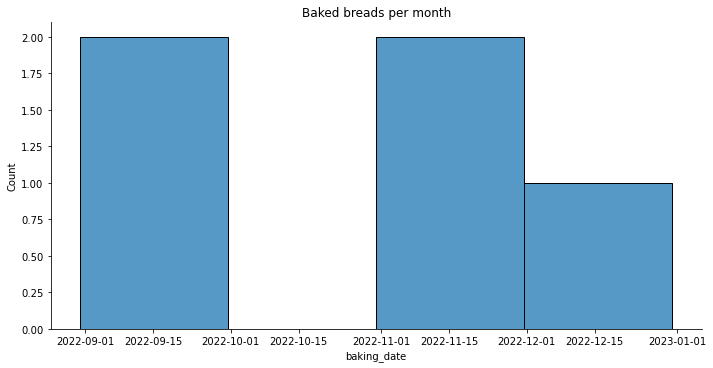

In [86]:
sns.displot(
    data=baked_bread.groupby(pd.Grouper(key="baking_date", freq="M"))[
        "bread_rating"
    ].mean(),
    x="baking_date",
    height=5,
    aspect=2,
).set(title='Baked breads per month');

[Text(0.5, 1.0, 'Bread rating')]

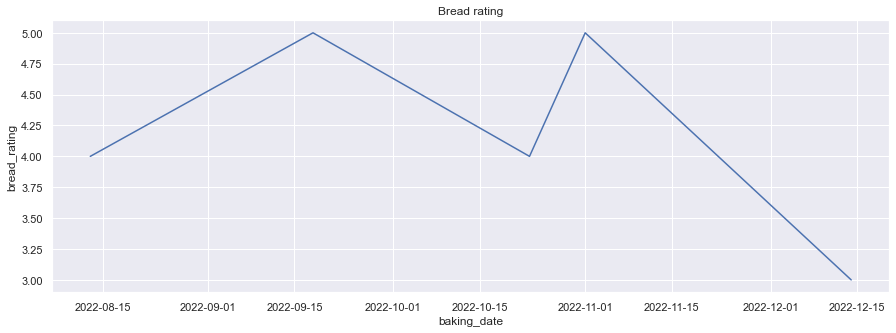

In [93]:
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(data=baked_bread, x='baking_date', y='bread_rating'
).set(title='Bread rating')

## Feeding

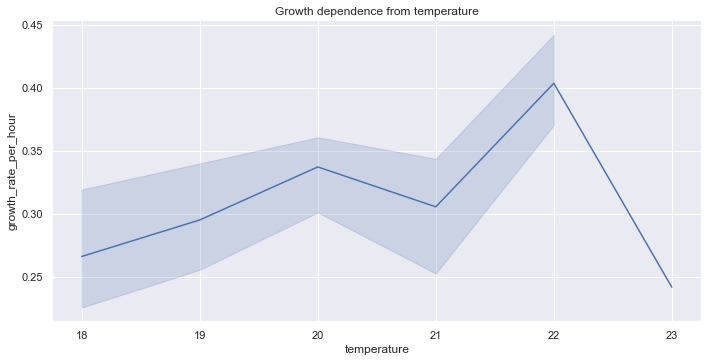

In [143]:
sns.relplot(data=feedings, x="temperature", y="growth_rate_per_hour", kind="line", height=5, aspect=2).set(
    title="Growth dependence from temperature"
);

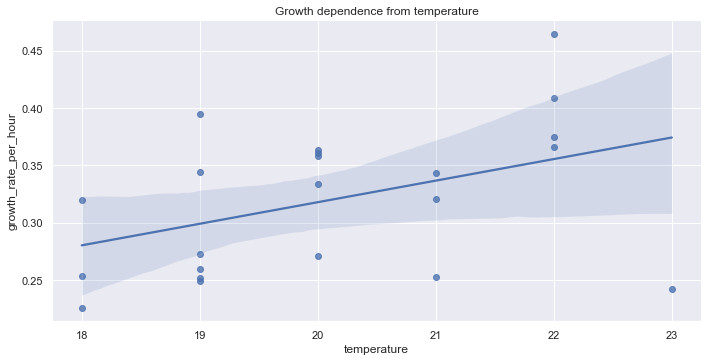

In [144]:
sns.lmplot(data=feedings, x='temperature', y='growth_rate_per_hour', height=5, aspect=2).set(
    title="Growth dependence from temperature"
);

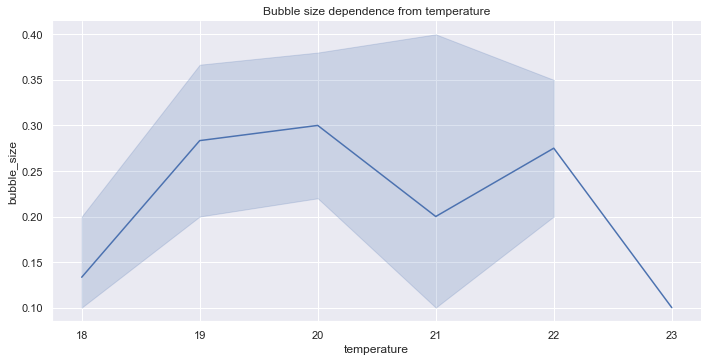

In [146]:
sns.relplot(data=feedings, x='temperature', y='bubble_size', kind='line',  height=5, aspect=2).set(
    title="Bubble size dependence from temperature"
);

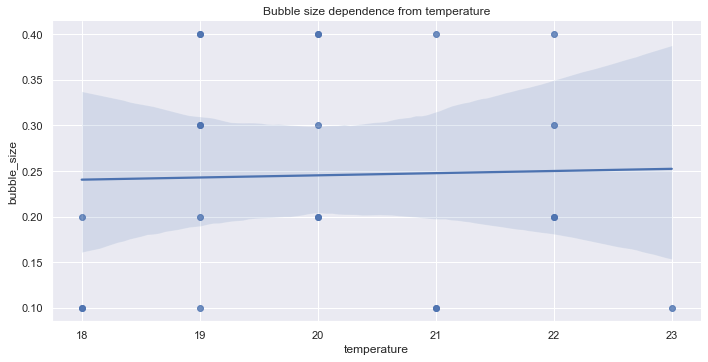

In [148]:
sns.lmplot(data=feedings, x='temperature', y='bubble_size', height=5, aspect=2).set(
    title="Bubble size dependence from temperature"
);

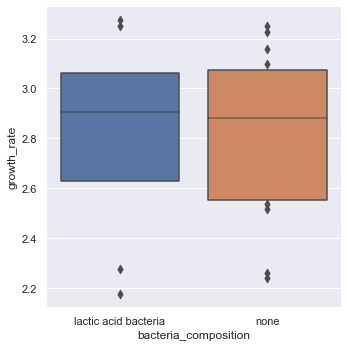

In [136]:
sns.catplot(data=feedings, x='bacteria_composition', y='growth_rate', kind='boxen');